In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [28]:
df = pd.read_csv('../genetic_algorithm/chk.csv', header=0)
df.columns = ['id', 'score']
df.head()

,id,score
0,0_6_4361,-10.033333
1,4_2_6567,-12.700000
2,1_4_350,-12.500000
3,0_6_571,-9.666667
4,2_2_62,-12.433333


In [29]:
df['ps'] = df.id.apply(lambda x: x.split('_')[0])
df['link'] = df.id.apply(lambda x: x.split('_')[1])
df['lig'] = df.id.apply(lambda x: x.split('_')[2])

In [30]:
df.head()
df = df[df.score < 0]

In [31]:
# average score for each ps and count of ps
ps_res = df.groupby('ps').agg({'score': 'mean', 'id': 'count'})
ps_res

,score,id
ps,,
0,-11.814315,17058
1,-11.261329,10597
2,-10.734031,8581
3,-10.557600,8575
4,-11.097974,10676
5,-11.222530,10683
6,-11.173693,10764


In [32]:
ps_res = ps_res[ps_res.index != 'ERROR']

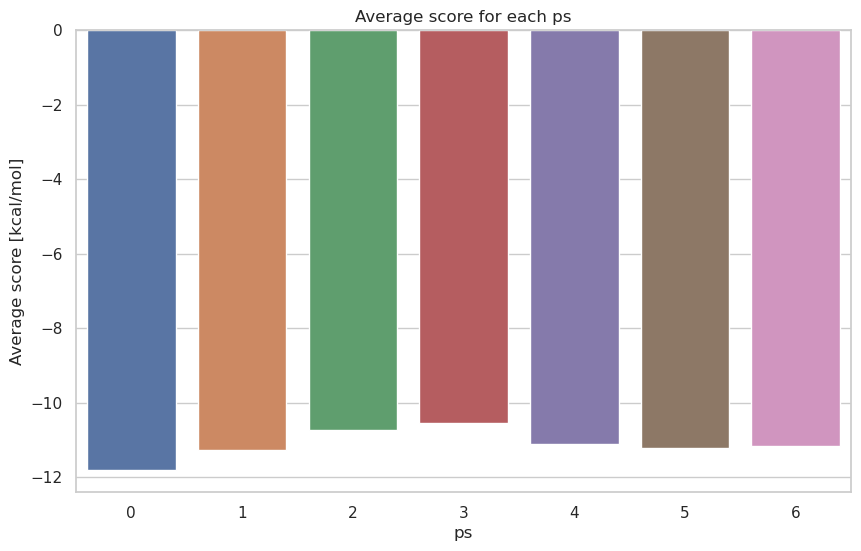

In [33]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=ps_res.index, y=ps_res.score, order=ps_res.index)
plt.title('Average score for each ps')
plt.xlabel('ps')
plt.ylabel('Average score [kcal/mol]')
plt.savefig('ps_par.svg', dpi=500)
plt.show()

In [34]:
# average score for each link
link_stat = df.groupby('link').agg({'score': 'mean', 'id': 'count'})
link_stat

,score,id
link,,
0,-11.344064,10937
1,-11.787585,14366
2,-11.891590,16218
3,-11.439943,12824
4,-10.824560,8936
5,-10.139525,7548
6,-9.158949,6105


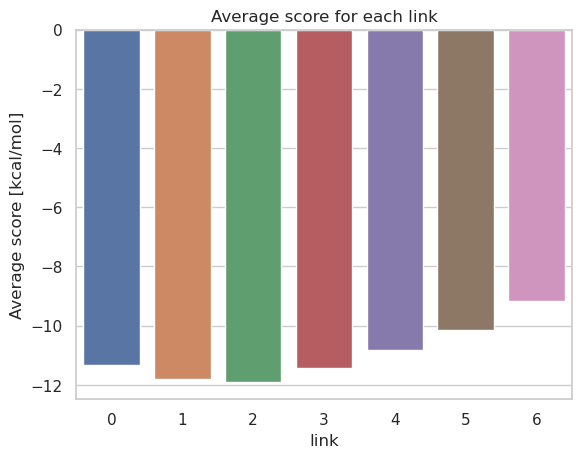

In [35]:
sns.barplot(x=link_stat.index, y=link_stat.score, order=link_stat.index)
plt.title('Average score for each link')
plt.xlabel('link')
plt.ylabel('Average score [kcal/mol]')
plt.savefig('link_par.svg', dpi=500)
plt.show()

In [36]:
# average score for each lig if count of lig > 1
non_single_ligs = df.groupby('lig').agg({'score': 'mean', 'id': 'count'})
better_ligs = non_single_ligs[non_single_ligs.id > 45]


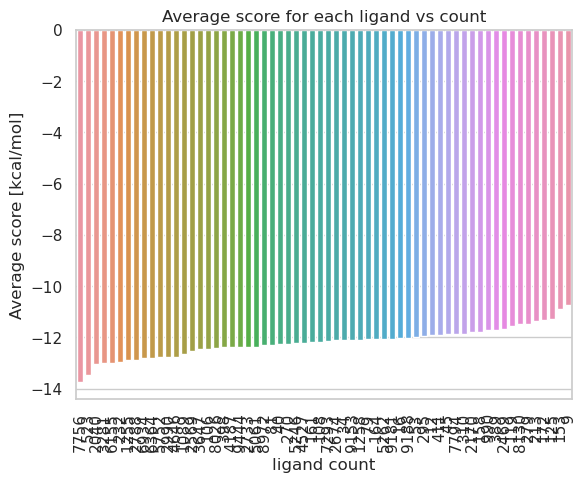

In [37]:
#plot count vs score for ligands
sns.set_style('whitegrid')
sns.barplot(x=better_ligs.index, y=better_ligs.score, order=better_ligs.score.sort_values().index)
plt.title('Average score for each ligand vs count')
plt.xlabel('ligand count')
plt.ylabel('Average score [kcal/mol]')
plt.xticks(rotation=90)
plt.show()

In [38]:
len(df)

76934

In [39]:
df.groupby(['ps', 'link']).agg({'score': 'mean', 'id': 'count'})

score    id
ps link                 
0  0    -11.960965  2508
   1    -12.457576  3135
   2    -12.432359  3490
   3    -12.049541  2721
   4    -11.442093  2013
   5    -10.850790  1750
   6     -9.908698  1441
1  0    -11.386849  1536
   1    -11.691006  1968
   2    -11.792567  2202
   3    -11.389661  1770
   4    -10.915685  1273
   5    -10.562214  1033
   6     -9.699182   815
2  0    -10.885612  1207
   1    -11.261752  1621
   2    -11.340651  1813
   3    -10.817167  1466
   4    -10.295879   995
   5     -9.862046   808
   6     -9.065549   671
3  0    -10.718311  1176
   1    -11.123973  1574
   2    -11.312496  1862
   3    -10.728219  1486
   4    -10.166667  1041
   5     -9.302919   828
   6     -8.429660   608
4  0    -11.273005  1483
   1    -11.710429  2004
   2    -11.886965  2322
   3    -11.276983  1803
   4    -10.673226  1184
   5     -9.954273  1022
   6     -8.801981   858
5  0    -11.296094  1536
   1    -11.832201  2016
   2    -12.000402  2241
   3    -11.624735  1795
   4    -10.876274  1204
   5     -9.915450  1027
   6     -8.852160   864
6  0    -11.247082  1491
   1    -11.812598  2048
   2    -11.967978  2288
   3    -11.643541  1783
   4    -10.799048  1226
   5     -9.820093  1080
   6     -8.636242   848

In [40]:
# plot dendrogram
par = df.groupby(['ps', 'link']).agg({'score': 'mean', 'id': 'count'})
par

score    id
ps link                 
0  0    -11.960965  2508
   1    -12.457576  3135
   2    -12.432359  3490
   3    -12.049541  2721
   4    -11.442093  2013
   5    -10.850790  1750
   6     -9.908698  1441
1  0    -11.386849  1536
   1    -11.691006  1968
   2    -11.792567  2202
   3    -11.389661  1770
   4    -10.915685  1273
   5    -10.562214  1033
   6     -9.699182   815
2  0    -10.885612  1207
   1    -11.261752  1621
   2    -11.340651  1813
   3    -10.817167  1466
   4    -10.295879   995
   5     -9.862046   808
   6     -9.065549   671
3  0    -10.718311  1176
   1    -11.123973  1574
   2    -11.312496  1862
   3    -10.728219  1486
   4    -10.166667  1041
   5     -9.302919   828
   6     -8.429660   608
4  0    -11.273005  1483
   1    -11.710429  2004
   2    -11.886965  2322
   3    -11.276983  1803
   4    -10.673226  1184
   5     -9.954273  1022
   6     -8.801981   858
5  0    -11.296094  1536
   1    -11.832201  2016
   2    -12.000402  2241
   3    -11.624735  1795
   4    -10.876274  1204
   5     -9.915450  1027
   6     -8.852160   864
6  0    -11.247082  1491
   1    -11.812598  2048
   2    -11.967978  2288
   3    -11.643541  1783
   4    -10.799048  1226
   5     -9.820093  1080
   6     -8.636242   848

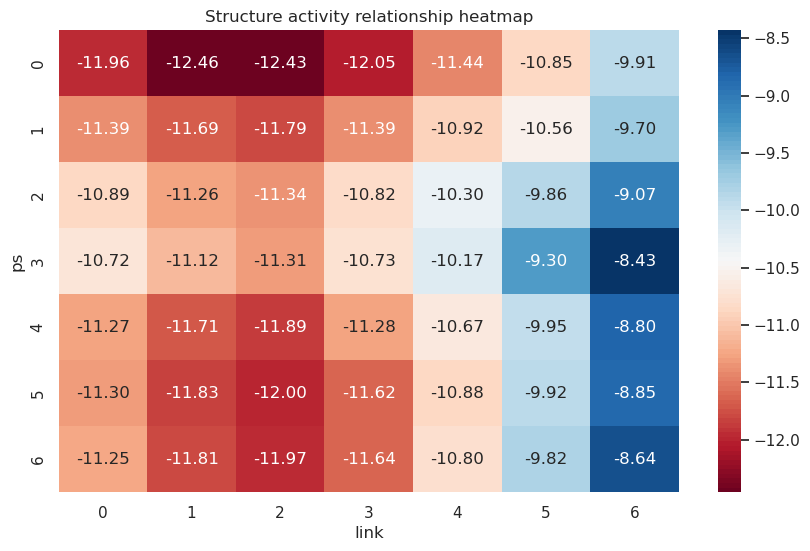

In [41]:
# plot score heatmap
sns.set(style='whitegrid')
pallet = sns.color_palette('RdBu_r',100)
# reverse pallet
pallet = pallet[::-1]
plt.figure(figsize=(10, 6))
sns.heatmap(par.score.unstack(), cmap=pallet, annot=True, fmt='.2f')
plt.title('Structure activity relationship heatmap')
plt.savefig('sar_heatmap.svg', dpi=500)
plt.show()

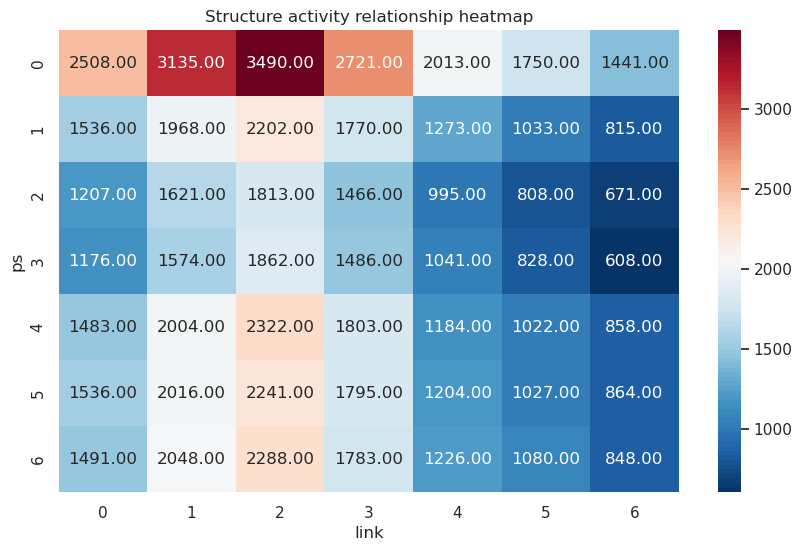

In [42]:
sns.set(style='whitegrid')
pallet = sns.color_palette('RdBu_r',100)
# reverse pallet
plt.figure(figsize=(10, 6))
sns.heatmap(par.id.unstack(), cmap=pallet, annot=True, fmt='.2f')
plt.title('Structure activity relationship heatmap')
plt.savefig('sar_heatmap2.svg', dpi=500)
plt.show()

In [43]:
# create heatmap with circle representing count
sns.set(style='whitegrid')
pallet = sns.color_palette('RdBu_r',100)
# reverse pallet
pallet = pallet[::-1]
score = par.score.unstack()
counts = par.id.unstack()
counts.head()

link,0,1,2,3,4,5,6
ps,,,,,,,
0,2508,3135,3490,2721,2013,1750,1441
1,1536,1968,2202,1770,1273,1033,815
2,1207,1621,1813,1466,995,808,671
3,1176,1574,1862,1486,1041,828,608
4,1483,2004,2322,1803,1184,1022,858


ValueError: [(0.4269896193771627, 0.007381776239907739, 0.12525951557093426), (0.46159169550173007, 0.01845444059976932, 0.13079584775086506), (0.48465974625144176, 0.025836216839677045, 0.1344867358708189), (0.5192618223760093, 0.03690888119953864, 0.1400230680507497), (0.5423298731257209, 0.044290657439446365, 0.1437139561707036), (0.5769319492502883, 0.05536332179930796, 0.14925028835063436), (0.6, 0.06274509803921569, 0.15294117647058825), (0.6346020761245674, 0.07381776239907728, 0.15847750865051904), (0.6576701268742791, 0.081199538638985, 0.1621683967704729), (0.6922722029988465, 0.0922722029988466, 0.1677047289504037), (0.7063437139561708, 0.11072664359861623, 0.17647058823529427), (0.7229527104959631, 0.1439446366782007, 0.19215686274509805), (0.7340253748558246, 0.16608996539792387, 0.20261437908496732), (0.7506343713956171, 0.19930795847750865, 0.21830065359477124), (0.7672433679354095, 0.23252595155709344, 0.23398692810457516), (0.778316032295271, 0.2546712802768166, 0.24444444444444444), (0.7949250288350636, 0.2878892733564017, 0.2601307189542485), (0.8059976931949251, 0.31003460207612454, 0.27058823529411763), (0.8226066897347174, 0.34325259515570933, 0.28627450980392155), (0.833679354094579, 0.3653979238754325, 0.29673202614379085), (0.8484429065743945, 0.39769319492502886, 0.3182622068435217), (0.8576701268742791, 0.41891580161476355, 0.33456362937331796), (0.8715109573241061, 0.4507497116493656, 0.3590157631680123), (0.8807381776239908, 0.47197231833910036, 0.3753171856978085), (0.8945790080738177, 0.5038062283737024, 0.39976931949250283), (0.9038062283737025, 0.5250288350634371, 0.4160707420222991), (0.9176470588235295, 0.5568627450980392, 0.44052287581699345), (0.9268742791234141, 0.578085351787774, 0.45682429834678967), (0.9407151095732411, 0.609919261822376, 0.481276432141484), (0.9545559400230681, 0.6417531718569781, 0.5057285659361783), (0.9589388696655133, 0.6595155709342561, 0.5257208765859285), (0.9630911188004614, 0.6844290657439447, 0.5575547866205306), (0.9658592848904268, 0.701038062283737, 0.5787773933102652), (0.9700115340253749, 0.7259515570934256, 0.6106113033448674), (0.9727797001153403, 0.7425605536332179, 0.631833910034602), (0.9769319492502884, 0.7674740484429068, 0.6636678200692044), (0.9797001153402538, 0.784083044982699, 0.6848904267589389), (0.9838523644752019, 0.8089965397923875, 0.716724336793541), (0.9866205305651673, 0.8256055363321799, 0.7379469434832757), (0.9907727797001153, 0.8505190311418684, 0.7697808535178777), (0.9912341407151096, 0.8631295655517108, 0.7877739331026528), (0.9884659746251442, 0.8760476739715494, 0.8099192618223761), (0.9866205305651673, 0.8846597462514417, 0.8246828143021915), (0.9838523644752019, 0.8975778546712803, 0.8468281430219147), (0.9810841983852364, 0.9104959630911188, 0.8689734717416379), (0.9792387543252595, 0.9191080353710112, 0.8837370242214533), (0.9764705882352941, 0.9320261437908497, 0.9058823529411765), (0.9746251441753172, 0.940638216070742, 0.9206459054209919), (0.9718569780853518, 0.9535563244905806, 0.9427912341407151), (0.9700115340253749, 0.962168396770473, 0.9575547866205306), (0.9598615916955018, 0.9644752018454441, 0.9670126874279124), (0.9481737793156478, 0.9589388696655132, 0.9648596693579392), (0.930642060745867, 0.9506343713956171, 0.9616301422529796), (0.9189542483660131, 0.9450980392156864, 0.9594771241830066), (0.9014225297962323, 0.9367935409457901, 0.956247597078047), (0.8897347174163783, 0.9312572087658593, 0.9540945790080738), (0.8722029988465976, 0.9229527104959632, 0.9508650519031142), (0.8546712802768167, 0.914648212226067, 0.9476355247981546), (0.8429834678969628, 0.9091118800461362, 0.9454825067281815), (0.825451749327182, 0.90080738177624, 0.9422529796232219), (0.8099192618223763, 0.8931180315263362, 0.93840830449827), (0.7808535178777394, 0.8783544790465206, 0.9301038062283737), (0.7614763552479817, 0.8685121107266438, 0.924567474048443), (0.7324106113033451, 0.8537485582468283, 0.9162629757785468), (0.7130334486735872, 0.8439061899269513, 0.910726643598616), (0.6839677047289505, 0.8291426374471358, 0.9024221453287198), (0.6645905420991928, 0.8193002691272588, 0.896885813148789), (0.6355247981545561, 0.8045367166474434, 0.8885813148788928), (0.6161476355247982, 0.7946943483275665, 0.883044982698962), (0.5870818915801616, 0.7799307958477509, 0.8747404844290658), (0.5664744329104192, 0.7687043444828914, 0.8685121107266437), (0.5300269127258748, 0.7456362937331797, 0.8560553633217993), (0.49357939254133043, 0.722568242983468, 0.8435986159169551), (0.4692810457516341, 0.7071895424836603, 0.8352941176470589), (0.43283352556708976, 0.6841214917339487, 0.8228373702422146), (0.4085351787773935, 0.6687427912341408, 0.8145328719723184), (0.3720876585928491, 0.6456747404844292, 0.8020761245674741), (0.3477893118031528, 0.6302960399846214, 0.7937716262975779), (0.3113417916186084, 0.6072279892349097, 0.7813148788927335), (0.28704344482891203, 0.5918492887351019, 0.7730103806228373), (0.25751633986928113, 0.5695501730103807, 0.7611687812379854), (0.24705882352941183, 0.5557093425605537, 0.7540945790080739), (0.23137254901960788, 0.5349480968858131, 0.7434832756632065), (0.22091503267973864, 0.5211072664359861, 0.7364090734332949), (0.2052287581699347, 0.5003460207612458, 0.7257977700884276), (0.19477124183006544, 0.48650519031141876, 0.718723567858516), (0.1790849673202615, 0.4657439446366783, 0.7081122645136486), (0.16339869281045757, 0.44498269896193776, 0.6975009611687812), (0.1529411764705883, 0.4311418685121108, 0.6904267589388697), (0.13725490196078435, 0.4103806228373703, 0.6798154555940024), (0.1272587466359093, 0.395847750865052, 0.6687427912341408), (0.11434063821607078, 0.3709342560553634, 0.6341407151095734), (0.10572856593617842, 0.35432525951557103, 0.6110726643598616), (0.0928104575163399, 0.3294117647058824, 0.5764705882352942), (0.08419838523644754, 0.31280276816609, 0.5534025374855825), (0.071280276816609, 0.2878892733564014, 0.5188004613610151), (0.06266820453671666, 0.27128027681660905, 0.49573241061130335), (0.04975009611687814, 0.24636678200692044, 0.4611303344867359), (0.04113802383698578, 0.22975778546712805, 0.4380622837370242), (0.028219915417147252, 0.20484429065743945, 0.40346020761245677)] is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

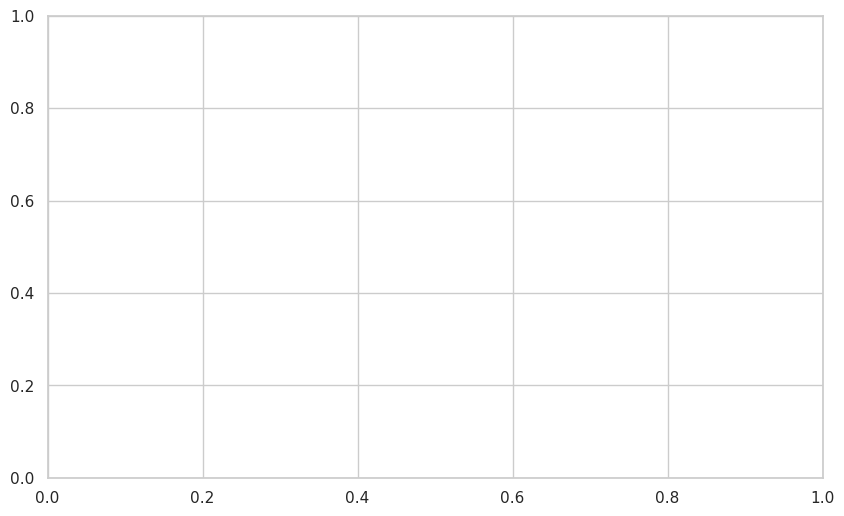

In [44]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(10, 6))
x,y = np.meshgrid(np.arange(score.shape[1]), np.arange(score.shape[0]))
color = score.values
size = counts.values
radius = size / size.max() / 2
circles = [Circle((j,i), radius[i,j]) for i,j in zip(x.flatten(), y.flatten())]
col = PatchCollection(circles, array=color, cmap=pallet, alpha=0.5)

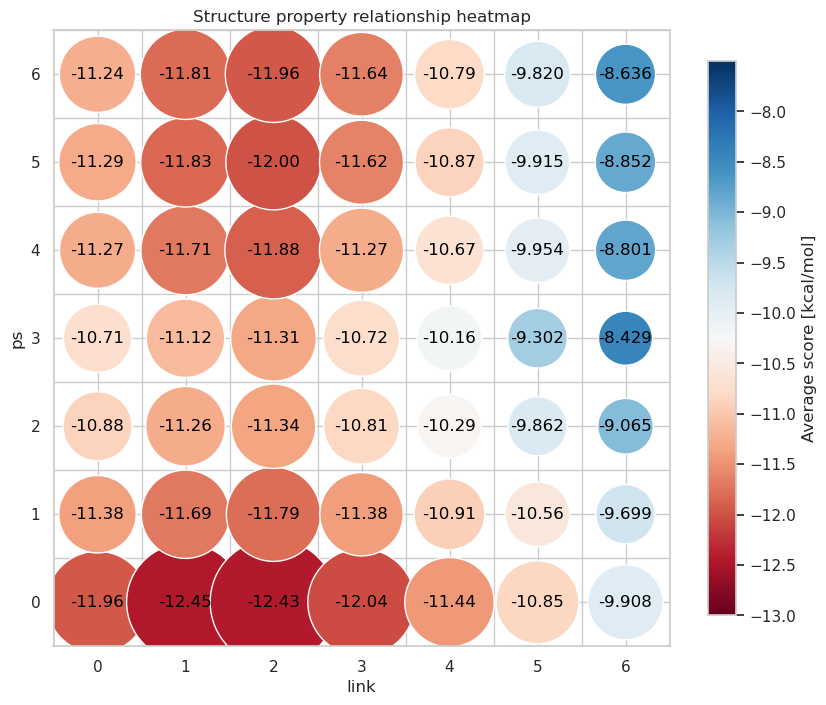

In [47]:
ylabels = score.index
xlabels = score.columns
M = len(xlabels)
N = len(ylabels)
x, y = np.meshgrid(np.arange(M), np.arange(N))
s = counts.values
c = score.values

fig, ax = plt.subplots(figsize=(10, 8))

R = s/s.max()/2 + 0.22
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
# create a colormap with red for low values, and blue for high values
pallet = plt.cm.RdBu

col = PatchCollection(circles, array=c.flatten(), cmap=pallet, alpha=1)
col.set_clim(-13, -7.5)
ax.add_collection(col)
colorbar = fig.colorbar(col, ax=ax, shrink=0.9)
colorbar.set_label('Average score [kcal/mol]')
colorbar.set_ticks(np.arange(-13, -7.5, 0.5))
ax.set_aspect('equal')
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')
for i, txt in enumerate(c.flat):
    txt = str(txt)[:6]
    ax.annotate(txt, (x.flat[i], y.flat[i]), ha='center', va='center', color='black')
plt.title('Structure property relationship heatmap')
plt.xlabel('link')
plt.ylabel('ps')
plt.savefig('sar_heatmap3.png', dpi=500, bbox_inches='tight')
